
Tuyến đường tốt nhất với chi phí tương ứng:
Thành phố 0 -> Thành phố 1 với chi phí: 35
Thành phố 1 -> Thành phố 2 với chi phí: 47
Thành phố 2 -> Thành phố 3 với chi phí: 52
Thành phố 3 -> Thành phố 4 với chi phí: 65
Thành phố 4 -> Thành phố 0 với chi phí: 74

Tổng chi phí của tuyến đường: 273
Thời gian thực thi: 0.003002643585205078 giây


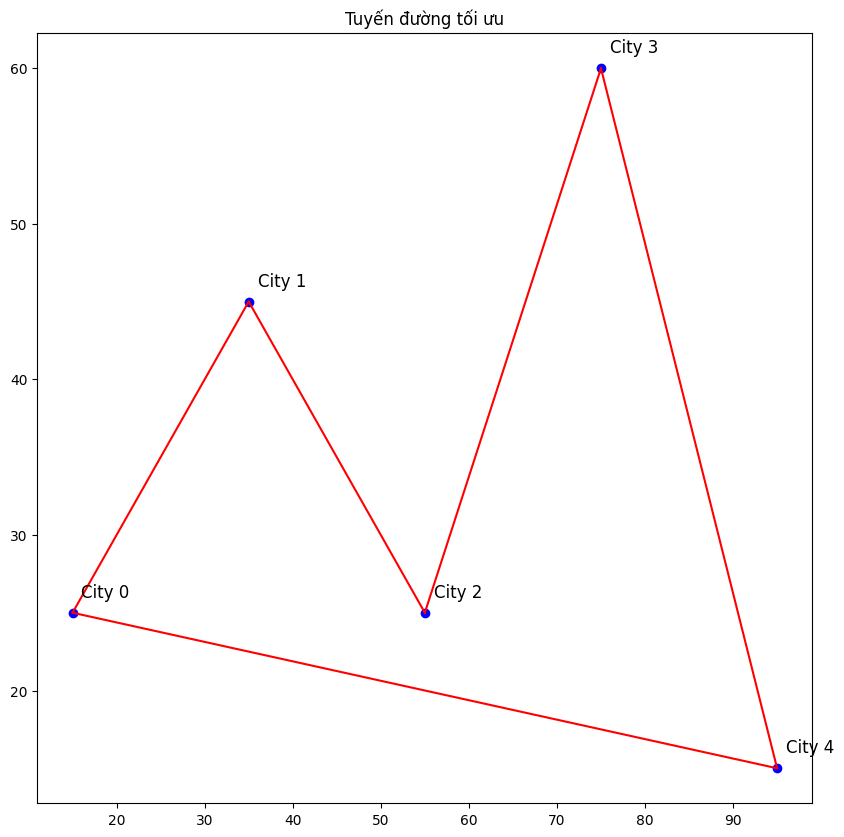

In [1]:
#
#?  Mô phỏng bài toán TSP với 5 thành phố bằng thuật toán tối ưu MIP (Chỉ dùng 1 tuyến đường mặc định)
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linprog
import time

# Số lượng thành phố
num_cities = 5

# Tạo ma trận chi phí/ khoảng cách cố định 
# (ví dụ, chi phí/ khoảng cách giữa các thành phố)
cost_matrix = np.array([
    [9999, 35, 42, 58, 74],
    [35, 9999, 47, 19, 81],
    [42, 47, 9999, 52, 31],
    [58, 19, 52, 9999, 65],
    [74, 81, 31, 65, 9999]
])

# Vẽ các thành phố trên mặt phẳng tọa độ
coordinates = np.array([
    [15, 25],
    [35, 45],
    [55, 25],
    [75, 60],
    [95, 15]
])

# Khởi tạo danh sách biến quyết định x[i][j] (0 hoặc 1)
x = np.zeros((num_cities, num_cities), dtype=int)

# Hàm mục tiêu: Tối thiểu hóa tổng chi phí
def objective_function(x, cost_matrix):
    return np.sum(x * cost_matrix)

# Ràng buộc: mỗi thành phố phải được ghé thăm và rời đi đúng một lần
def constraints(x):
    for i in range(num_cities):
        if np.sum(x[i, :]) != 1 or np.sum(x[:, i]) != 1:
            return False
    return True

# Loại bỏ chu trình phụ (subtour)
def subtour_elimination(x):
    visited = [False] * num_cities
    for i in range(num_cities):
        if not visited[i]:
            current_city = i
            cycle_length = 0
            while not visited[current_city]:
                visited[current_city] = True
                next_city = np.argmax(x[current_city, :])
                cycle_length += 1
                current_city = next_city
            if cycle_length < num_cities:
                return False
    return True

# Bắt đầu đo thời gian thực thi
start_time = time.time()

# Tìm lời giải tối ưu
min_cost = float('inf')
best_route = None
# Sử dụng một tuyến đường mặc định
current_x = np.zeros((num_cities, num_cities), dtype=int)

# Chọn một tuyến đường mặc định 
# (ví dụ: từ thành phố 0 đến 1, 1 đến 2, ..., cuối cùng quay về 0)
for i in range(num_cities - 1):
    current_x[i, i + 1] = 1
current_x[num_cities - 1, 0] = 1  # Quay về thành phố đầu tiên

if constraints(current_x) and subtour_elimination(current_x):
    current_cost = objective_function(current_x, cost_matrix)
    if current_cost < min_cost:
        min_cost = current_cost
        best_route = current_x

# Kết thúc đo thời gian thực thi
end_time = time.time()
execution_time = end_time - start_time

# Kết quả
if best_route is not None:
    print("\nTuyến đường tốt nhất với chi phí tương ứng:")
    
    total_cost = 0
    
    for i in range(num_cities):
        for j in range(num_cities):
            if best_route[i, j] == 1:
                segment_cost = cost_matrix[i][j]
                total_cost += segment_cost
                print(f"Thành phố {i} -> Thành phố {j} với chi phí: {segment_cost}")

    print(f"\nTổng chi phí của tuyến đường: {total_cost}")
    print(f"Thời gian thực thi: {execution_time} giây")

    # Vẽ đường đi của thành phố
    plt.figure(figsize=(10, 10))
    for i in range(num_cities):
        plt.plot(coordinates[i, 0], coordinates[i, 1], 'bo')
        plt.text(coordinates[i, 0] + 1, coordinates[i, 1] + 1, f'City {i}', fontsize=12)

    for i in range(num_cities):
        for j in range(num_cities):
            if best_route[i, j] == 1:
                plt.plot([coordinates[i, 0], coordinates[j, 0]], [coordinates[i, 1], coordinates[j, 1]], 'r-')

    plt.title("Tuyến đường tối ưu")
    plt.show()
else:
    print("Không tìm thấy lời giải hợp lệ.")


Tuyến đường tốt nhất với chi phí tương ứng:
Thành phố 0 -> Thành phố 1 với chi phí: 35
Thành phố 1 -> Thành phố 3 với chi phí: 19
Thành phố 2 -> Thành phố 0 với chi phí: 42
Thành phố 3 -> Thành phố 4 với chi phí: 65
Thành phố 4 -> Thành phố 2 với chi phí: 31

Tổng chi phí của tuyến đường: 192
Thời gian thực thi: 0.07141613960266113 giây


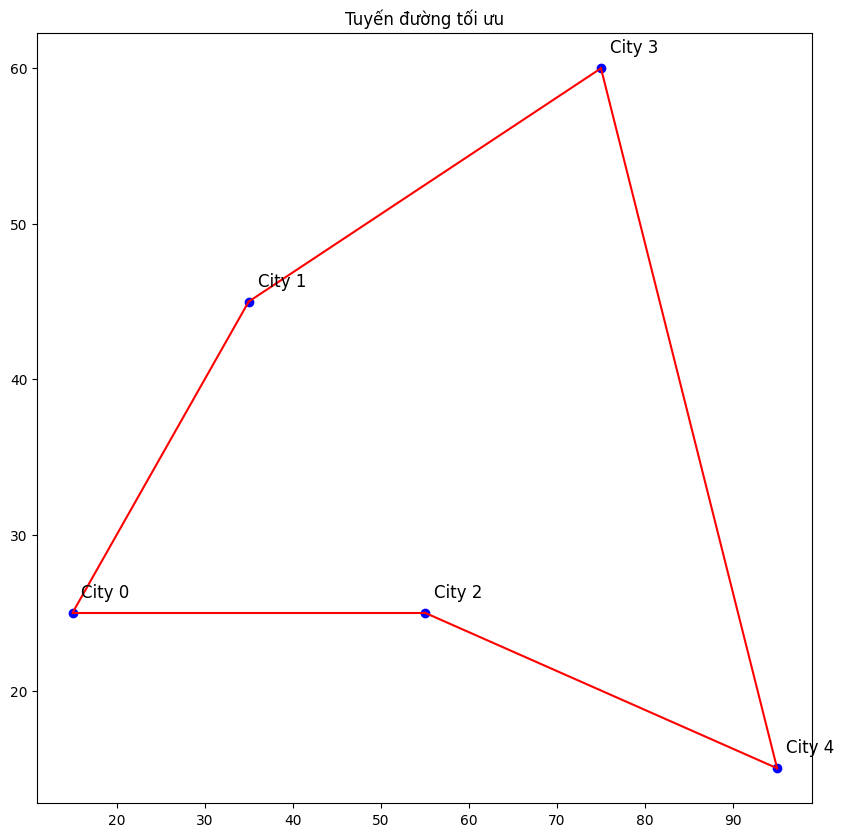

In [95]:
#
#? Mô phỏng bài toán TSP với 5 thành phố bằng thuật toán tối ưu MIP (Tạo hoán vị ngẫu nhiên với cho các thành phố)
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linprog
import time

# Số lượng thành phố
num_cities = 5

# Tạo ma trận chi phí cố định mới (ví dụ, khoảng cách giữa các thành phố)
cost_matrix = np.array([
    [9999, 35, 42, 58, 74],
    [35, 9999, 47, 19, 81],
    [42, 47, 9999, 52, 31],
    [58, 19, 52, 9999, 65],
    [74, 81, 31, 65, 9999]
])

# Vẽ các thành phố trên mặt phẳng tọa độ (cố định)
coordinates = np.array([
    [15, 25],
    [35, 45],
    [55, 25],
    [75, 60],
    [95, 15]
])

# Khởi tạo danh sách biến quyết định x[i][j] (0 hoặc 1)
x = np.zeros((num_cities, num_cities), dtype=int)

# Hàm mục tiêu: Tối thiểu hóa tổng chi phí
def objective_function(x, cost_matrix):
    return np.sum(x * cost_matrix)

# Ràng buộc: mỗi thành phố phải được ghé thăm và rời đi đúng một lần
def constraints(x):
    for i in range(num_cities):
        if np.sum(x[i, :]) != 1 or np.sum(x[:, i]) != 1:
            return False
    return True

# Loại bỏ chu trình phụ (subtour)
def subtour_elimination(x):
    visited = [False] * num_cities
    for i in range(num_cities):
        if not visited[i]:
            current_city = i
            cycle_length = 0
            while not visited[current_city]:
                visited[current_city] = True
                next_city = np.argmax(x[current_city, :])
                cycle_length += 1
                current_city = next_city
            if cycle_length < num_cities:
                return False
    return True

# Bắt đầu đo thời gian thực thi
start_time = time.time()

# Tìm lời giải tối ưu
min_cost = float('inf')
best_route = None

# Tạo hoán vị ngẫu nhiên cho các thành phố
for _ in range(1000):  # Số lần thử ngẫu nhiên
    perm = np.random.permutation(num_cities)
    current_x = np.zeros((num_cities, num_cities), dtype=int)

    for i in range(num_cities - 1):
        current_x[perm[i], perm[i + 1]] = 1
    current_x[perm[-1], perm[0]] = 1  # Quay về thành phố đầu tiên
    
    if constraints(current_x) and subtour_elimination(current_x):
        current_cost = objective_function(current_x, cost_matrix)
        if current_cost < min_cost:
            min_cost = current_cost
            best_route = current_x

# Kết thúc đo thời gian thực thi
end_time = time.time()
execution_time = end_time - start_time

# Kết quả
if best_route is not None:
    print("\nTuyến đường tốt nhất với chi phí tương ứng:")
    
    total_cost = 0
    
    for i in range(num_cities):
        for j in range(num_cities):
            if best_route[i, j] == 1:
                segment_cost = cost_matrix[i][j]
                total_cost += segment_cost
                print(f"Thành phố {i} -> Thành phố {j} với chi phí: {segment_cost}")

    print(f"\nTổng chi phí của tuyến đường: {total_cost}")
    print(f"Thời gian thực thi: {execution_time} giây")

    # Vẽ đường đi của thành phố
    plt.figure(figsize=(10, 10))
    for i in range(num_cities):
        plt.plot(coordinates[i, 0], coordinates[i, 1], 'bo')
        plt.text(coordinates[i, 0] + 1, coordinates[i, 1] + 1, f'City {i}', fontsize=12)

    for i in range(num_cities):
        for j in range(num_cities):
            if best_route[i, j] == 1:
                plt.plot([coordinates[i, 0], coordinates[j, 0]], [coordinates[i, 1], coordinates[j, 1]], 'r-')

    plt.title("Tuyến đường tối ưu")
    plt.show()
else:
    print("Không tìm thấy lời giải hợp lệ.")

Tuyến đường tốt nhất:
Thành phố 0 -> Thành phố 2 với chi phí 42
Thành phố 1 -> Thành phố 0 với chi phí 35
Thành phố 2 -> Thành phố 4 với chi phí 31
Thành phố 3 -> Thành phố 1 với chi phí 19
Thành phố 4 -> Thành phố 3 với chi phí 65
Tổng chi phí: 192.0
Thời gian thực thi: 0.07815170288085938 giây


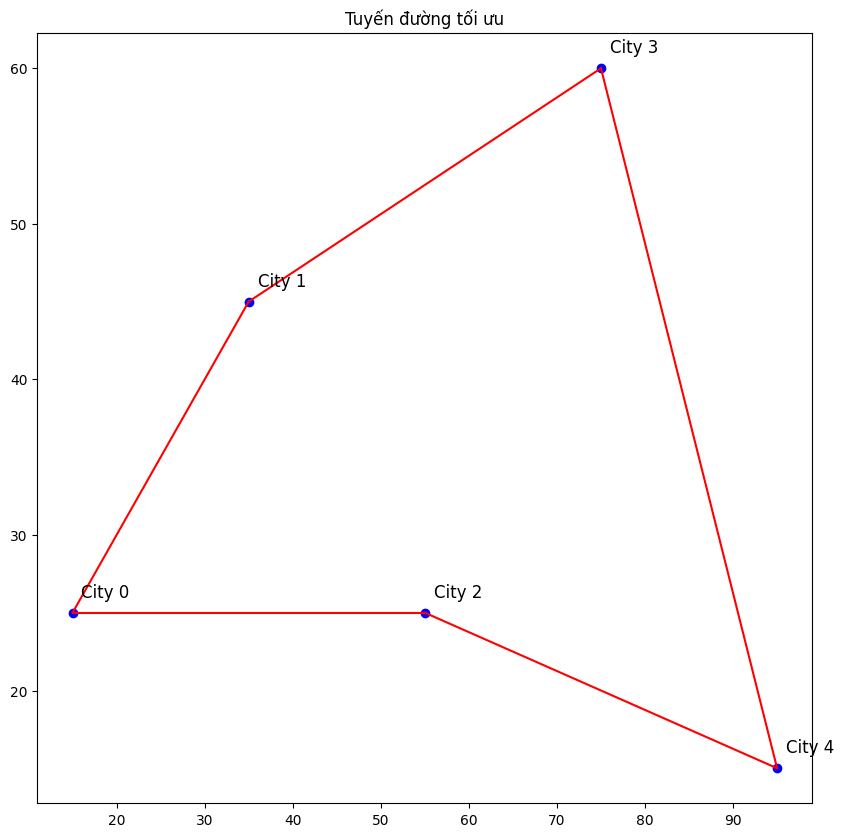

In [96]:
#
#?  Mô phỏng bài toán TSP với 5 thành phố bằng thuật toán tối ưu MIP (Sử dụng thư viện Pulp)
import pulp
import numpy as np
import matplotlib.pyplot as plt
import time

# Số lượng thành phố
num_cities = 5

# Tạo ma trận chi phí cố định
cost_matrix = np.array([
    [9999, 35, 42, 58, 74],
    [35, 9999, 47, 19, 81],
    [42, 47, 9999, 52, 31],
    [58, 19, 52, 9999, 65],
    [74, 81, 31, 65, 9999]
])

# Tọa độ các thành phố trên mặt phẳng tọa độ
coordinates = np.array([
    [15, 25],
    [35, 45],
    [55, 25],
    [75, 60],
    [95, 15]
])

# Khởi tạo mô hình tối ưu hóa
problem = pulp.LpProblem("TSP", pulp.LpMinimize)

# Tạo biến quyết định x[i][j]: 1 nếu thành phố i đi đến thành phố j
x = pulp.LpVariable.dicts("x", [(i, j) for i in range(num_cities) for j in range(num_cities)], cat='Binary')

# Hàm mục tiêu: Tối thiểu hóa tổng chi phí
problem += pulp.lpSum([cost_matrix[i][j] * x[i, j] for i in range(num_cities) for j in range(num_cities)])

# Ràng buộc: mỗi thành phố phải được ghé thăm và rời đi đúng một lần
for i in range(num_cities):
    problem += pulp.lpSum([x[i, j] for j in range(num_cities) if i != j]) == 1
    problem += pulp.lpSum([x[j, i] for j in range(num_cities) if i != j]) == 1

# Ràng buộc loại bỏ chu trình phụ
u = pulp.LpVariable.dicts("u", range(num_cities), lowBound=0, upBound=num_cities-1, cat='Integer')
for i in range(1, num_cities):
    for j in range(1, num_cities):
        if i != j:
            problem += u[i] - u[j] + num_cities * x[i, j] <= num_cities - 1

# Bắt đầu đo thời gian thực thi
start_time = time.time()

# Giải bài toán
problem.solve()

# Kết thúc đo thời gian thực thi
end_time = time.time()
execution_time = end_time - start_time

# Lấy kết quả
route = []
for i in range(num_cities):
    for j in range(num_cities):
        if pulp.value(x[i, j]) == 1:
            route.append((i, j))

print("Tuyến đường tốt nhất:")
for (i, j) in route:
    print(f"Thành phố {i} -> Thành phố {j} với chi phí {cost_matrix[i][j]}")

total_cost = pulp.value(problem.objective)
print(f"Tổng chi phí: {total_cost}")
print(f"Thời gian thực thi: {execution_time} giây")

# Vẽ tuyến đường tốt nhất
plt.figure(figsize=(10, 10))
for i in range(num_cities):
    plt.plot(coordinates[i, 0], coordinates[i, 1], 'bo')
    plt.text(coordinates[i, 0] + 1, coordinates[i, 1] + 1, f'City {i}', fontsize=12)

for (i, j) in route:
    plt.plot([coordinates[i, 0], coordinates[j, 0]], [coordinates[i, 1], coordinates[j, 1]], 'r-')

plt.title("Tuyến đường tối ưu")
plt.show()



Tuyến đường tốt nhất với chi phí tương ứng:
Thành phố 0 -> Thành phố 4 với chi phí: 16
Thành phố 1 -> Thành phố 9 với chi phí: 43
Thành phố 2 -> Thành phố 0 với chi phí: 20
Thành phố 3 -> Thành phố 1 với chi phí: 19
Thành phố 4 -> Thành phố 8 với chi phí: 36
Thành phố 5 -> Thành phố 3 với chi phí: 28
Thành phố 6 -> Thành phố 5 với chi phí: 20
Thành phố 7 -> Thành phố 6 với chi phí: 29
Thành phố 8 -> Thành phố 7 với chi phí: 44
Thành phố 9 -> Thành phố 2 với chi phí: 64

Tổng chi phí của tuyến đường: 319
Thời gian thực thi: 0.9024989604949951 giây


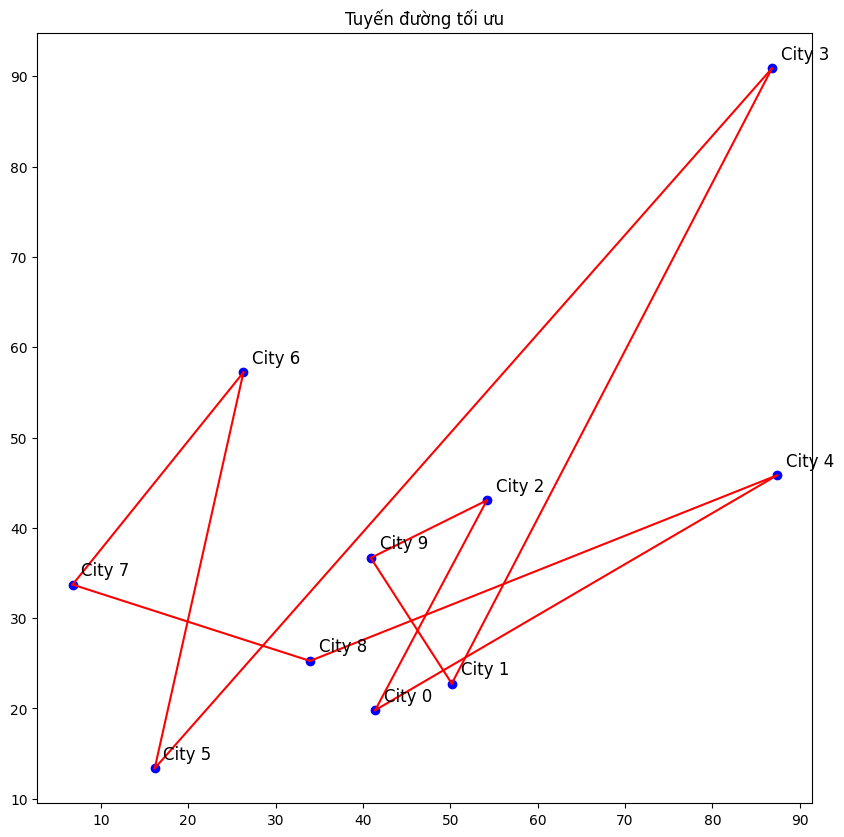

In [1]:
# 
### Mô phỏng bài toán TSP với 10 thành phố bằng thuật toán tối ưu MIP
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linprog
import time

# Số lượng thành phố
num_cities = 10

# Tạo ma trận chi phí cố định
cost_matrix = np.array([
    [9999, 29, 20, 21, 16, 48, 52, 74, 33, 56],
    [29, 9999, 47, 19, 81, 39, 62, 77, 27, 43],
    [20, 47, 9999, 52, 31, 40, 35, 84, 26, 64],
    [21, 19, 52, 9999, 65, 28, 37, 45, 50, 58],
    [16, 81, 31, 65, 9999, 44, 57, 73, 36, 49],
    [48, 39, 40, 28, 44, 9999, 20, 53, 39, 68],
    [52, 62, 35, 37, 57, 20, 9999, 29, 34, 59],
    [74, 77, 84, 45, 73, 53, 29, 9999, 44, 55],
    [33, 27, 26, 50, 36, 39, 34, 44, 9999, 71],
    [56, 43, 64, 58, 49, 68, 59, 55, 71, 9999]
])

# Điều chỉnh tọa độ các thành phố sao cho không bị chồng chéo và cách xa nhau hơn
coordinates = np.array([
    [100, 200],
    [300, 400],
    [500, 200],
    [700, 500],
    [900, 100],
    [200, 700],
    [400, 900],
    [600, 300],
    [800, 600],
    [250, 900]
])

# Vẽ các thành phố trên mặt phẳng tọa độ
coordinates = np.random.rand(num_cities, 2) * 100

# Khởi tạo danh sách biến quyết định x[i][j] (0 hoặc 1)
x = np.zeros((num_cities, num_cities), dtype=int)

# Hàm mục tiêu: Tối thiểu hóa tổng chi phí
def objective_function(x, cost_matrix):
    return np.sum(x * cost_matrix)

# Ràng buộc: mỗi thành phố phải được ghé thăm và rời đi đúng một lần
def constraints(x):
    for i in range(num_cities):
        if np.sum(x[i, :]) != 1 or np.sum(x[:, i]) != 1:
            return False
    return True

# Loại bỏ chu trình phụ (subtour)
def subtour_elimination(x):
    visited = [False] * num_cities
    for i in range(num_cities):
        if not visited[i]:
            current_city = i
            cycle_length = 0
            while not visited[current_city]:
                visited[current_city] = True
                next_city = np.argmax(x[current_city, :])
                cycle_length += 1
                current_city = next_city
            if cycle_length < num_cities:
                return False
    return True

# Bắt đầu đo thời gian thực thi
start_time = time.time()

# Tìm lời giải tối ưu
min_cost = float('inf')
best_route = None

# Số lần thử ngẫu nhiên
iterations = 10000

# Tạo hoán vị ngẫu nhiên cho các thành phố
for _ in range(iterations):  # Số lần thử ngẫu nhiên
    perm = np.random.permutation(num_cities)
    current_x = np.zeros((num_cities, num_cities), dtype=int)
    
    for i in range(num_cities - 1):
        current_x[perm[i], perm[i + 1]] = 1
    current_x[perm[-1], perm[0]] = 1  # Quay về thành phố đầu tiên

    if constraints(current_x) and subtour_elimination(current_x):
        current_cost = objective_function(current_x, cost_matrix)
        if current_cost < min_cost:
            min_cost = current_cost
            best_route = current_x

# Kết thúc đo thời gian thực thi
end_time = time.time()
execution_time = end_time - start_time

# Kết quả
if best_route is not None:
    print("\nTuyến đường tốt nhất với chi phí tương ứng:")
    
    total_cost = 0
    
    for i in range(num_cities):
        for j in range(num_cities):
            if best_route[i, j] == 1:
                segment_cost = cost_matrix[i][j]
                total_cost += segment_cost
                print(f"Thành phố {i} -> Thành phố {j} với chi phí: {segment_cost}")

    print(f"\nTổng chi phí của tuyến đường: {total_cost}")
    print(f"Thời gian thực thi: {execution_time} giây")

    # Vẽ đường đi của thành phố
    plt.figure(figsize=(10, 10))
    for i in range(num_cities):
        plt.plot(coordinates[i, 0], coordinates[i, 1], 'bo')
        plt.text(coordinates[i, 0] + 1, coordinates[i, 1] + 1, f'City {i}', fontsize=12)

    for i in range(num_cities):
        for j in range(num_cities):
            if best_route[i, j] == 1:
                plt.plot([coordinates[i, 0], coordinates[j, 0]], [coordinates[i, 1], coordinates[j, 1]], 'r-')

    plt.title("Tuyến đường tối ưu")
    plt.show()
else:
    print("Không tìm thấy lời giải hợp lệ.")

Tuyến đường tốt nhất:
Thành phố 0 -> Thành phố 2 với chi phí 20
Thành phố 1 -> Thành phố 3 với chi phí 19
Thành phố 2 -> Thành phố 8 với chi phí 26
Thành phố 3 -> Thành phố 5 với chi phí 28
Thành phố 4 -> Thành phố 0 với chi phí 16
Thành phố 5 -> Thành phố 6 với chi phí 20
Thành phố 6 -> Thành phố 7 với chi phí 29
Thành phố 7 -> Thành phố 9 với chi phí 55
Thành phố 8 -> Thành phố 1 với chi phí 27
Thành phố 9 -> Thành phố 4 với chi phí 49
Tổng chi phí: 289.0
Thời gian thực thi: 0.16731643676757812 giây


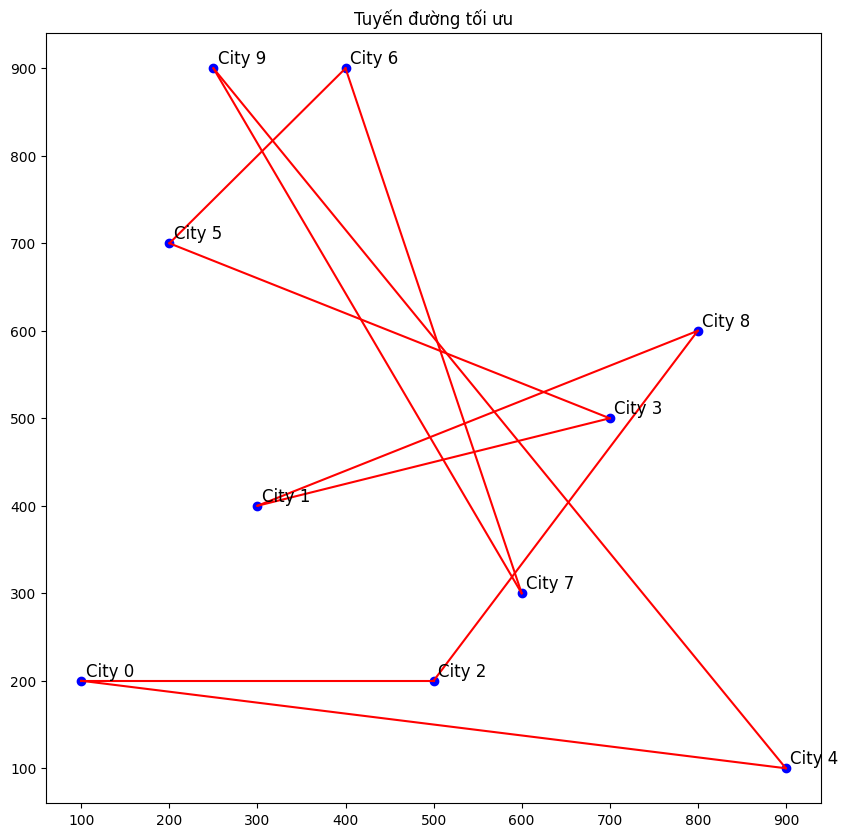

In [3]:
#
#* Mô phỏng bài toán TSP với 10 thành phố bằng thuật toán tối ưu MIP (Sử dụng thư viện)
import pulp
import numpy as np
import matplotlib.pyplot as plt
import time

# Số lượng thành phố
num_cities = 10

# Tạo ma trận chi phí cố định
cost_matrix = np.array([
    [9999, 29, 20, 21, 16, 48, 52, 74, 33, 56],
    [29, 9999, 47, 19, 81, 39, 62, 77, 27, 43],
    [20, 47, 9999, 52, 31, 40, 35, 84, 26, 64],
    [21, 19, 52, 9999, 65, 28, 37, 45, 50, 58],
    [16, 81, 31, 65, 9999, 44, 57, 73, 36, 49],
    [48, 39, 40, 28, 44, 9999, 20, 53, 39, 68],
    [52, 62, 35, 37, 57, 20, 9999, 29, 34, 59],
    [74, 77, 84, 45, 73, 53, 29, 9999, 44, 55],
    [33, 27, 26, 50, 36, 39, 34, 44, 9999, 71],
    [56, 43, 64, 58, 49, 68, 59, 55, 71, 9999]
])

# Điều chỉnh tọa độ các thành phố sao cho không bị chồng chéo và cách xa nhau hơn
coordinates = np.array([
    [100, 200],
    [300, 400],
    [500, 200],
    [700, 500],
    [900, 100],
    [200, 700],
    [400, 900],
    [600, 300],
    [800, 600],
    [250, 900]
])

# Khởi tạo mô hình tối ưu hóa
problem = pulp.LpProblem("TSP", pulp.LpMinimize)

# Tạo biến quyết định x[i][j]: 1 nếu thành phố i đi đến thành phố j
x = pulp.LpVariable.dicts("x", [(i, j) for i in range(num_cities) for j in range(num_cities)], cat='Binary')

# Hàm mục tiêu: Tối thiểu hóa tổng chi phí
problem += pulp.lpSum([cost_matrix[i][j] * x[i, j] for i in range(num_cities) for j in range(num_cities)])

# Ràng buộc: mỗi thành phố phải được ghé thăm và rời đi đúng một lần
for i in range(num_cities):
    problem += pulp.lpSum([x[i, j] for j in range(num_cities) if i != j]) == 1
    problem += pulp.lpSum([x[j, i] for j in range(num_cities) if i != j]) == 1

# Ràng buộc loại bỏ chu trình phụ
u = pulp.LpVariable.dicts("u", range(num_cities), lowBound=0, upBound=num_cities-1, cat='Integer')
for i in range(1, num_cities):
    for j in range(1, num_cities):
        if i != j:
            problem += u[i] - u[j] + num_cities * x[i, j] <= num_cities - 1

# Bắt đầu đo thời gian thực thi
start_time = time.time()

# Giải bài toán
problem.solve()

# Kết thúc đo thời gian thực thi
end_time = time.time()
execution_time = end_time - start_time

# Lấy kết quả
route = []
for i in range(num_cities):
    for j in range(num_cities):
        if pulp.value(x[i, j]) == 1:
            route.append((i, j))

print("Tuyến đường tốt nhất:")
for (i, j) in route:
    print(f"Thành phố {i} -> Thành phố {j} với chi phí {cost_matrix[i][j]}")

total_cost = pulp.value(problem.objective)
print(f"Tổng chi phí: {total_cost}")
print(f"Thời gian thực thi: {execution_time} giây")

# Vẽ tuyến đường tốt nhất
plt.figure(figsize=(10, 10))
for i in range(num_cities):
    plt.plot(coordinates[i, 0], coordinates[i, 1], 'bo')
    plt.text(coordinates[i, 0] + 5, coordinates[i, 1] + 5, f'City {i}', fontsize=12)

for (i, j) in route:
    plt.plot([coordinates[i, 0], coordinates[j, 0]], [coordinates[i, 1], coordinates[j, 1]], 'r-')

plt.title("Tuyến đường tối ưu")
plt.show()

Tuyến đường tốt nhất:
Thành phố 0 -> Thành phố 1 với chi phí 22
Thành phố 1 -> Thành phố 11 với chi phí 13
Thành phố 2 -> Thành phố 4 với chi phí 13
Thành phố 3 -> Thành phố 10 với chi phí 19
Thành phố 4 -> Thành phố 19 với chi phí 15
Thành phố 5 -> Thành phố 8 với chi phí 19
Thành phố 6 -> Thành phố 12 với chi phí 18
Thành phố 7 -> Thành phố 6 với chi phí 15
Thành phố 8 -> Thành phố 16 với chi phí 34
Thành phố 9 -> Thành phố 2 với chi phí 28
Thành phố 10 -> Thành phố 0 với chi phí 12
Thành phố 11 -> Thành phố 14 với chi phí 18
Thành phố 12 -> Thành phố 18 với chi phí 15
Thành phố 13 -> Thành phố 17 với chi phí 11
Thành phố 14 -> Thành phố 13 với chi phí 22
Thành phố 15 -> Thành phố 7 với chi phí 14
Thành phố 16 -> Thành phố 15 với chi phí 24
Thành phố 17 -> Thành phố 5 với chi phí 17
Thành phố 18 -> Thành phố 9 với chi phí 11
Thành phố 19 -> Thành phố 3 với chi phí 17
Tổng chi phí: 357.0
Thời gian thực thi: 8.908533573150635 giây


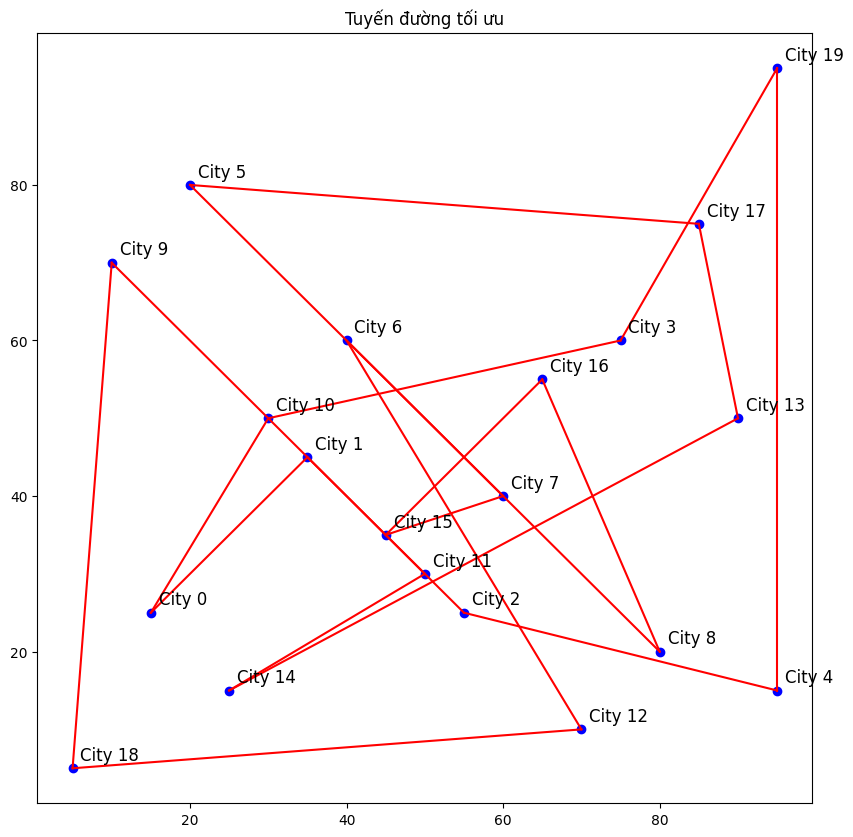

In [4]:
#
#? Mô phỏng bài toán TSP với 20 thành phố bằng thuật toán tối ưu MIP (Sử dụng thư viện)
import pulp
import numpy as np
import matplotlib.pyplot as plt
import time

# Số lượng thành phố
num_cities = 20

# Tạo ma trận chi phí cố định (ví dụ, khoảng cách giữa các thành phố)
cost_matrix = np.array([
    [9999, 22, 53, 36, 78, 44, 58, 93, 71, 64, 12, 55, 67, 48, 38, 74, 86, 57, 29, 42],
    [22, 9999, 91, 55, 45, 24, 39, 87, 93, 33, 67, 13, 45, 64, 77, 52, 69, 23, 94, 35],
    [53, 91, 9999, 66, 13, 61, 76, 42, 87, 28, 39, 56, 78, 25, 59, 83, 35, 44, 21, 64],
    [36, 55, 66, 9999, 22, 77, 13, 28, 93, 52, 19, 81, 24, 68, 41, 15, 62, 89, 34, 17],
    [78, 45, 13, 22, 9999, 31, 52, 84, 57, 63, 18, 34, 29, 61, 82, 71, 59, 26, 94, 15],
    [44, 24, 61, 77, 31, 9999, 48, 26, 19, 92, 81, 23, 37, 85, 52, 60, 33, 17, 14, 45],
    [58, 39, 76, 13, 52, 48, 9999, 15, 83, 21, 67, 42, 18, 24, 93, 62, 59, 38, 46, 26],
    [93, 87, 42, 28, 84, 26, 15, 9999, 71, 54, 44, 63, 22, 12, 85, 14, 51, 19, 32, 58],
    [71, 93, 87, 93, 57, 19, 83, 71, 9999, 62, 49, 29, 47, 24, 38, 69, 34, 56, 78, 91],
    [64, 33, 28, 52, 63, 92, 21, 54, 62, 9999, 43, 71, 85, 34, 92, 18, 25, 29, 11, 56],
    [12, 67, 39, 19, 18, 81, 67, 44, 49, 43, 9999, 58, 26, 73, 32, 61, 72, 84, 53, 27],
    [55, 13, 56, 81, 34, 23, 42, 63, 29, 71, 58, 9999, 94, 36, 18, 51, 47, 65, 87, 14],
    [67, 45, 78, 24, 29, 37, 18, 22, 47, 85, 26, 94, 9999, 75, 64, 31, 82, 92, 15, 53],
    [48, 64, 25, 68, 61, 85, 24, 12, 24, 34, 73, 36, 75, 9999, 22, 55, 38, 11, 44, 88],
    [38, 77, 59, 41, 82, 52, 93, 85, 38, 92, 32, 18, 64, 22, 9999, 63, 48, 67, 74, 81],
    [74, 52, 83, 15, 71, 60, 62, 14, 69, 18, 61, 51, 31, 55, 63, 9999, 24, 32, 59, 95],
    [86, 69, 35, 62, 59, 33, 59, 51, 34, 25, 72, 47, 82, 38, 48, 24, 9999, 78, 46, 27],
    [57, 23, 44, 89, 26, 17, 38, 19, 56, 29, 84, 65, 92, 11, 67, 32, 78, 9999, 21, 63],
    [29, 94, 21, 34, 94, 14, 46, 32, 78, 11, 53, 87, 15, 44, 74, 59, 46, 21, 9999, 35],
    [42, 35, 64, 17, 15, 45, 26, 58, 91, 56, 27, 14, 53, 88, 81, 95, 27, 63, 35, 9999]
])

# Vẽ các thành phố trên mặt phẳng tọa độ (cố định)
coordinates = np.array([
    [15, 25],
    [35, 45],
    [55, 25],
    [75, 60],
    [95, 15],
    [20, 80],
    [40, 60],
    [60, 40],
    [80, 20],
    [10, 70],
    [30, 50],
    [50, 30],
    [70, 10],
    [90, 50],
    [25, 15],
    [45, 35],
    [65, 55],
    [85, 75],
    [5, 5],
    [95, 95]
])

# Khởi tạo mô hình tối ưu hóa
problem = pulp.LpProblem("TSP", pulp.LpMinimize)

# Tạo biến quyết định x[i][j]: 1 nếu thành phố i đi đến thành phố j
x = pulp.LpVariable.dicts("x", [(i, j) for i in range(num_cities) for j in range(num_cities)], cat='Binary')

# Hàm mục tiêu: Tối thiểu hóa tổng chi phí
problem += pulp.lpSum([cost_matrix[i][j] * x[i, j] for i in range(num_cities) for j in range(num_cities)])

# Ràng buộc: mỗi thành phố phải được ghé thăm và rời đi đúng một lần
for i in range(num_cities):
    problem += pulp.lpSum([x[i, j] for j in range(num_cities) if i != j]) == 1
    problem += pulp.lpSum([x[j, i] for j in range(num_cities) if i != j]) == 1

# Ràng buộc loại bỏ chu trình phụ
u = pulp.LpVariable.dicts("u", range(num_cities), lowBound=0, upBound=num_cities-1, cat='Integer')
for i in range(1, num_cities):
    for j in range(1, num_cities):
        if i != j:
            problem += u[i] - u[j] + num_cities * x[i, j] <= num_cities - 1

# Bắt đầu đo thời gian thực thi
start_time = time.time()

# Giải bài toán
problem.solve()

# Kết thúc đo thời gian thực thi
end_time = time.time()
execution_time = end_time - start_time

# Lấy kết quả
route = []
for i in range(num_cities):
    for j in range(num_cities):
        if pulp.value(x[i, j]) == 1:
            route.append((i, j))

print("Tuyến đường tốt nhất:")
for (i, j) in route:
    print(f"Thành phố {i} -> Thành phố {j} với chi phí {cost_matrix[i][j]}")

total_cost = pulp.value(problem.objective)
print(f"Tổng chi phí: {total_cost}")
print(f"Thời gian thực thi: {execution_time} giây")

# Vẽ tuyến đường tốt nhất
plt.figure(figsize=(10, 10))
for i in range(num_cities):
    plt.plot(coordinates[i, 0], coordinates[i, 1], 'bo')
    plt.text(coordinates[i, 0] + 1, coordinates[i, 1] + 1, f'City {i}', fontsize=12)

for (i, j) in route:
    plt.plot([coordinates[i, 0], coordinates[j, 0]], [coordinates[i, 1], coordinates[j, 1]], 'r-')

plt.title("Tuyến đường tối ưu")
plt.show()

Tuyến đường tốt nhất:
Thành phố 0 -> Thành phố 9 với chi phí 19
Thành phố 1 -> Thành phố 17 với chi phí 18
Thành phố 2 -> Thành phố 36 với chi phí 27
Thành phố 3 -> Thành phố 15 với chi phí 19
Thành phố 4 -> Thành phố 22 với chi phí 19
Thành phố 5 -> Thành phố 30 với chi phí 29
Thành phố 6 -> Thành phố 29 với chi phí 19
Thành phố 7 -> Thành phố 24 với chi phí 24
Thành phố 8 -> Thành phố 20 với chi phí 19
Thành phố 9 -> Thành phố 3 với chi phí 21
Thành phố 10 -> Thành phố 11 với chi phí 21
Thành phố 11 -> Thành phố 38 với chi phí 29
Thành phố 12 -> Thành phố 14 với chi phí 19
Thành phố 13 -> Thành phố 19 với chi phí 21
Thành phố 14 -> Thành phố 35 với chi phí 28
Thành phố 15 -> Thành phố 37 với chi phí 29
Thành phố 16 -> Thành phố 6 với chi phí 19
Thành phố 17 -> Thành phố 39 với chi phí 28
Thành phố 18 -> Thành phố 28 với chi phí 32
Thành phố 19 -> Thành phố 2 với chi phí 27
Thành phố 20 -> Thành phố 32 với chi phí 31
Thành phố 21 -> Thành phố 10 với chi phí 21
Thành phố 22 -> Thành ph

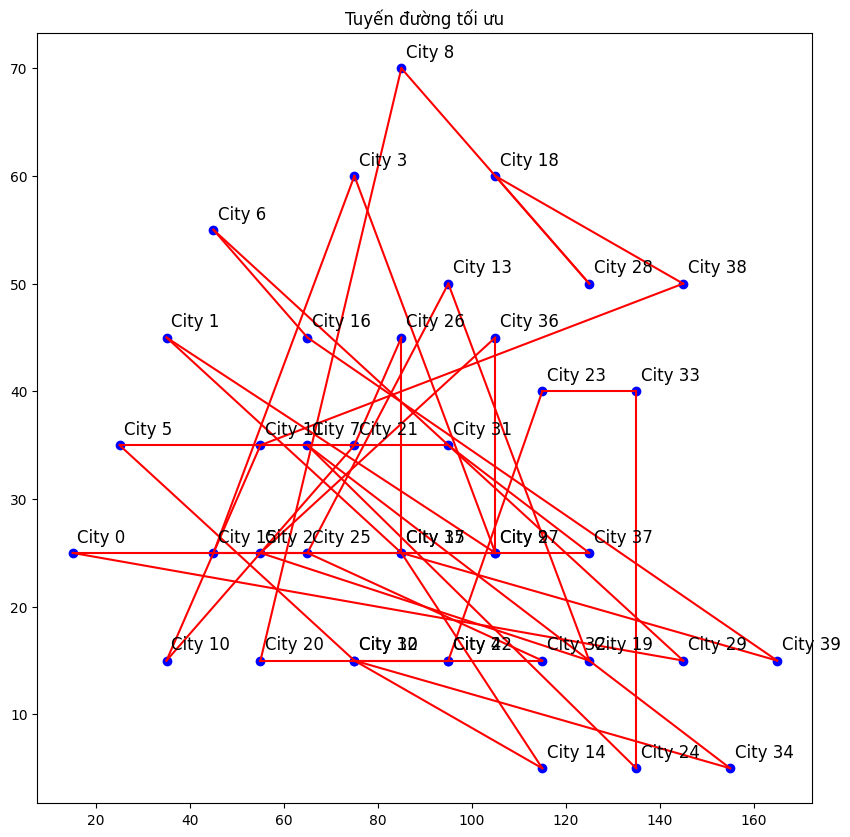

In [5]:
#
#? Mô phỏng bài toán TSP với 40 thành phố bằng thuật toán tối ưu MIP (Sử dụng thư viện PulP)
import numpy as np
import pulp
import matplotlib.pyplot as plt
import time

# Số lượng thành phố
num_cities = 40

cost_matrix = np.array([
    [9999, 35, 42, 58, 74, 91, 63, 27, 38, 19, 42, 56, 74, 85, 31, 53, 44, 25, 78, 93,
     35, 42, 58, 74, 91, 63, 27, 38, 19, 42, 56, 74, 85, 31, 53, 44, 25, 78, 93, 61],
    [35, 9999, 47, 19, 81, 64, 53, 22, 41, 29, 33, 49, 64, 78, 28, 61, 32, 18, 69, 84,
     45, 47, 19, 81, 64, 53, 22, 41, 29, 33, 49, 64, 78, 28, 61, 32, 18, 69, 84, 71],
    [42, 47, 9999, 52, 31, 87, 54, 39, 49, 62, 36, 55, 87, 62, 37, 73, 58, 45, 81, 27,
     52, 31, 87, 54, 39, 49, 62, 36, 55, 87, 62, 37, 73, 58, 45, 81, 27, 73, 41, 58],
    [58, 19, 52, 9999, 65, 23, 48, 34, 56, 21, 61, 75, 83, 43, 55, 19, 71, 48, 79, 56,
     65, 23, 48, 34, 56, 21, 61, 75, 83, 43, 55, 19, 71, 48, 79, 56, 71, 82, 39, 45],
    [74, 81, 31, 65, 9999, 52, 46, 19, 38, 72, 29, 33, 64, 48, 57, 85, 34, 42, 78, 91,
     52, 46, 19, 38, 72, 29, 33, 64, 48, 57, 85, 34, 42, 78, 91, 32, 29, 47, 85, 73],
    [91, 64, 87, 23, 52, 9999, 31, 59, 42, 33, 87, 56, 73, 41, 68, 52, 29, 55, 88, 67,
     31, 59, 42, 33, 87, 56, 73, 41, 68, 52, 29, 55, 88, 67, 73, 57, 39, 64, 29, 52],
    [63, 53, 54, 48, 46, 31, 9999, 22, 57, 68, 42, 75, 23, 58, 34, 67, 19, 49, 87, 43,
     22, 57, 68, 42, 75, 23, 58, 34, 67, 19, 49, 87, 43, 58, 37, 27, 53, 64, 42, 31],
    [27, 22, 39, 34, 19, 59, 22, 9999, 42, 37, 58, 75, 24, 49, 35, 62, 41, 27, 74, 87,
     42, 37, 58, 75, 24, 49, 35, 62, 41, 27, 74, 87, 35, 32, 23, 48, 29, 57, 31, 28],
    [38, 41, 49, 56, 38, 42, 57, 42, 9999, 19, 53, 79, 43, 85, 34, 58, 49, 45, 68, 73,
     19, 53, 79, 43, 85, 34, 58, 49, 45, 68, 73, 57, 31, 28, 41, 58, 47, 32, 56, 42],
    [19, 29, 62, 21, 72, 33, 68, 37, 19, 9999, 31, 44, 65, 54, 57, 28, 48, 37, 62, 85,
     31, 44, 65, 54, 57, 28, 48, 37, 62, 85, 32, 41, 29, 47, 63, 75, 57, 43, 29, 51],
    [42, 33, 36, 61, 29, 87, 42, 58, 53, 31, 9999, 21, 74, 39, 47, 62, 52, 43, 67, 48,
     21, 74, 39, 47, 62, 52, 43, 67, 48, 57, 31, 29, 63, 47, 52, 43, 69, 78, 45, 41],
    [56, 49, 55, 75, 33, 56, 75, 75, 79, 44, 21, 9999, 28, 63, 58, 32, 48, 59, 72, 57,
     28, 63, 58, 32, 48, 59, 72, 57, 47, 31, 52, 78, 29, 32, 41, 54, 47, 36, 29, 65],
    [74, 64, 87, 83, 64, 73, 23, 24, 43, 65, 74, 28, 9999, 42, 19, 48, 53, 65, 87, 74,
     42, 19, 48, 53, 65, 87, 74, 29, 34, 42, 37, 58, 45, 47, 29, 32, 57, 48, 35, 43],
    [85, 78, 62, 43, 48, 41, 58, 49, 85, 54, 39, 63, 42, 9999, 53, 72, 63, 78, 54, 21,
     53, 72, 63, 78, 54, 21, 53, 47, 38, 43, 57, 29, 52, 41, 29, 28, 31, 57, 43, 61],
    [31, 28, 37, 55, 57, 68, 34, 35, 34, 57, 47, 58, 19, 53, 9999, 37, 56, 49, 64, 72,
     37, 56, 49, 64, 72, 63, 47, 38, 49, 56, 42, 31, 58, 47, 36, 28, 27, 39, 41, 59],
    [53, 61, 73, 19, 85, 52, 67, 62, 58, 28, 62, 32, 48, 72, 37, 9999, 29, 42, 75, 81,
     29, 42, 75, 81, 64, 57, 39, 49, 58, 73, 67, 41, 28, 32, 47, 58, 41, 29, 32, 45],
    [44, 32, 58, 71, 34, 29, 19, 41, 49, 48, 52, 48, 53, 63, 56, 29, 9999, 57, 62, 84,
     57, 62, 84, 57, 62, 74, 53, 41, 29, 57, 49, 36, 29, 47, 58, 31, 42, 47, 57, 32],
    [25, 18, 45, 48, 42, 55, 49, 27, 45, 37, 43, 59, 65, 78, 49, 42, 57, 9999, 31, 65,
     57, 42, 67, 53, 68, 74, 63, 41, 49, 35, 67, 32, 48, 31, 57, 49, 53, 62, 32, 28],
    [78, 69, 81, 79, 78, 88, 87, 74, 68, 62, 67, 72, 87, 54, 64, 75, 62, 31, 9999, 42,
     67, 74, 57, 58, 67, 78, 57, 43, 32, 47, 63, 64, 57, 49, 35, 67, 41, 58, 39, 57],
    [93, 84, 27, 56, 91, 67, 43, 87, 73, 85, 48, 57, 74, 21, 72, 81, 84, 65, 42, 9999,
     57, 74, 63, 67, 74, 63, 57, 47, 49, 57, 64, 73, 57, 39, 48, 41, 32, 57, 41, 38],
    [61, 71, 58, 45, 73, 52, 31, 28, 42, 51, 41, 65, 43, 61, 59, 45, 32, 28, 57, 38,
     9999, 43, 39, 48, 41, 32, 49, 43, 57, 51, 39, 42, 31, 39, 47, 38, 31, 57, 45, 53],
    [35, 45, 52, 65, 52, 31, 22, 42, 19, 31, 21, 28, 42, 53, 37, 29, 57, 57, 67, 57,
     43, 9999, 31, 48, 57, 41, 29, 57, 49, 32, 29, 31, 47, 39, 38, 57, 47, 52, 61, 39],
    [42, 47, 31, 87, 46, 59, 57, 37, 53, 44, 74, 63, 19, 72, 56, 42, 62, 42, 74, 74,
     39, 31, 9999, 32, 47, 43, 57, 39, 31, 48, 67, 58, 45, 49, 63, 47, 58, 32, 41, 51],
    [58, 19, 54, 34, 19, 42, 68, 58, 79, 65, 47, 32, 53, 78, 64, 81, 84, 67, 58, 67,
     48, 48, 32, 9999, 42, 29, 47, 35, 67, 57, 45, 38, 31, 29, 41, 32, 57, 58, 67, 57],
    [74, 81, 39, 56, 72, 33, 75, 24, 43, 57, 63, 48, 65, 54, 72, 64, 57, 68, 67, 74,
     41, 57, 47, 42, 9999, 57, 43, 67, 58, 63, 39, 51, 57, 32, 39, 47, 58, 49, 37, 41],
    [91, 64, 49, 21, 29, 87, 23, 49, 85, 28, 62, 59, 87, 21, 63, 57, 74, 74, 78, 63,
     32, 41, 43, 29, 57, 9999, 41, 58, 47, 49, 41, 32, 28, 39, 67, 31, 29, 58, 31, 37],
    [63, 53, 62, 61, 33, 56, 58, 35, 34, 47, 52, 72, 74, 53, 47, 39, 53, 63, 57, 57,
     49, 29, 57, 47, 43, 41, 9999, 42, 57, 39, 58, 57, 45, 49, 67, 31, 39, 47, 58, 45],
    [27, 22, 36, 34, 29, 41, 34, 62, 28, 43, 67, 57, 29, 47, 38, 49, 41, 41, 43, 47,
     43, 57, 39, 35, 67, 58, 42, 9999, 57, 39, 48, 41, 47, 58, 29, 41, 39, 47, 29, 57],
    [38, 41, 55, 56, 47, 68, 27, 41, 19, 29, 48, 47, 34, 38, 49, 58, 29, 49, 32, 49,
     57, 49, 31, 67, 58, 47, 57, 57, 9999, 47, 45, 48, 67, 31, 32, 29, 39, 41, 57, 35],
    [19, 33, 62, 21, 57, 52, 53, 27, 45, 29, 57, 31, 42, 43, 56, 73, 57, 35, 47, 57,
     51, 32, 48, 57, 63, 49, 39, 39, 47, 9999, 32, 29, 43, 29, 39, 41, 31, 57, 45, 48],
    [42, 49, 62, 61, 85, 41, 64, 74, 68, 39, 57, 52, 37, 57, 42, 67, 49, 67, 64, 57,
     39, 29, 67, 45, 39, 41, 58, 48, 45, 32, 9999, 39, 58, 47, 31, 39, 47, 58, 35, 57],
    [56, 63, 37, 19, 34, 29, 58, 87, 57, 47, 29, 32, 58, 29, 31, 41, 36, 32, 57, 73,
     31, 31, 58, 38, 51, 32, 57, 41, 48, 29, 39, 9999, 43, 39, 41, 28, 29, 32, 57, 41],
    [74, 78, 45, 71, 42, 55, 43, 35, 31, 63, 63, 78, 45, 52, 28, 32, 47, 57, 49, 57,
     47, 47, 45, 31, 57, 28, 45, 47, 67, 43, 58, 43, 9999, 42, 57, 31, 41, 32, 57, 48],
    [85, 28, 29, 48, 29, 73, 47, 32, 28, 47, 47, 29, 37, 29, 36, 41, 58, 48, 35, 39,
     38, 39, 49, 29, 32, 39, 49, 58, 31, 29, 47, 39, 42, 9999, 41, 39, 57, 39, 57, 43],
    [31, 53, 73, 71, 47, 29, 27, 23, 41, 63, 52, 41, 29, 52, 47, 41, 47, 31, 57, 48,
     57, 38, 63, 29, 39, 67, 67, 29, 32, 39, 31, 41, 57, 41, 9999, 31, 41, 42, 39, 57],
    [53, 44, 58, 82, 85, 57, 31, 48, 56, 75, 78, 47, 32, 28, 58, 32, 58, 57, 67, 41,
     39, 57, 47, 32, 47, 31, 31, 41, 29, 41, 39, 28, 31, 39, 31, 9999, 47, 31, 57, 38],
    [44, 25, 45, 39, 32, 73, 39, 29, 47, 57, 69, 41, 48, 31, 41, 58, 42, 49, 41, 32,
     47, 58, 63, 41, 39, 29, 39, 29, 39, 31, 47, 29, 41, 57, 41, 47, 9999, 41, 57, 49],
    [25, 78, 41, 82, 29, 39, 39, 57, 32, 43, 78, 31, 57, 57, 39, 41, 47, 53, 39, 41,
     38, 31, 58, 57, 47, 58, 47, 39, 41, 41, 47, 29, 41, 39, 42, 31, 41, 9999, 39, 41],
    [78, 93, 73, 39, 47, 64, 42, 31, 56, 29, 45, 29, 48, 43, 41, 29, 57, 49, 32, 41,
     31, 57, 41, 67, 58, 31, 58, 29, 57, 57, 35, 57, 57, 57, 39, 57, 57, 39, 9999, 35],
    [93, 61, 41, 45, 85, 52, 31, 28, 42, 51, 41, 65, 43, 61, 59, 45, 32, 28, 57, 38,
     53, 39, 51, 57, 41, 37, 45, 57, 39, 48, 41, 41, 48, 43, 57, 38, 49, 41, 35, 9999],
])

coordinates = np.array([
    [15, 25], [35, 45], [55, 25], [75, 60], [95, 15],
    [25, 35], [45, 55], [65, 35], [85, 70], [105, 25],
    [35, 15], [55, 35], [75, 15], [95, 50], [115, 5],
    [45, 25], [65, 45], [85, 25], [105, 60], [125, 15],
    [55, 15], [75, 35], [95, 15], [115, 40], [135, 5],
    [65, 25], [85, 45], [105, 25], [125, 50], [145, 15],
    [75, 15], [95, 35], [115, 15], [135, 40], [155, 5],
    [85, 25], [105, 45], [125, 25], [145, 50], [165, 15]
])

# Khởi tạo mô hình tối ưu hóa
problem = pulp.LpProblem("TSP", pulp.LpMinimize)

# Tạo biến quyết định x[i][j]: 1 nếu thành phố i đi đến thành phố j
x = pulp.LpVariable.dicts("x", [(i, j) for i in range(num_cities) for j in range(num_cities)], cat='Binary')

# Hàm mục tiêu: Tối thiểu hóa tổng chi phí
problem += pulp.lpSum([cost_matrix[i][j] * x[i, j] for i in range(num_cities) for j in range(num_cities)])

# Ràng buộc: mỗi thành phố phải được ghé thăm và rời đi đúng một lần
for i in range(num_cities):
    problem += pulp.lpSum([x[i, j] for j in range(num_cities) if i != j]) == 1
    problem += pulp.lpSum([x[j, i] for j in range(num_cities) if i != j]) == 1

# Ràng buộc loại bỏ chu trình phụ
u = pulp.LpVariable.dicts("u", range(num_cities), lowBound=0, upBound=num_cities-1, cat='Integer')
for i in range(1, num_cities):
    for j in range(1, num_cities):
        if i != j:
            problem += u[i] - u[j] + num_cities * x[i, j] <= num_cities - 1

# Bắt đầu đo thời gian thực thi
start_time = time.time()

# Giải bài toán
problem.solve()

# Kết thúc đo thời gian thực thi
end_time = time.time()
execution_time = end_time - start_time

# Lấy kết quả
route = []
for i in range(num_cities):
    for j in range(num_cities):
        if pulp.value(x[i, j]) == 1:
            route.append((i, j))

print("Tuyến đường tốt nhất:")
for (i, j) in route:
    print(f"Thành phố {i} -> Thành phố {j} với chi phí {cost_matrix[i][j]}")

total_cost = pulp.value(problem.objective)
print(f"Tổng chi phí: {total_cost}")
print(f"Thời gian thực thi: {execution_time} giây")

# Vẽ tuyến đường tốt nhất
plt.figure(figsize=(10, 10))
for i in range(num_cities):
    plt.plot(coordinates[i, 0], coordinates[i, 1], 'bo')
    plt.text(coordinates[i, 0] + 1, coordinates[i, 1] + 1, f'City {i}', fontsize=12)

for (i, j) in route:
    plt.plot([coordinates[i, 0], coordinates[j, 0]], [coordinates[i, 1], coordinates[j, 1]], 'r-')

plt.title("Tuyến đường tối ưu")
plt.show()

Tuyến đường tốt nhất:
Thành phố 0 -> Thành phố 65 với chi phí 15
Thành phố 1 -> Thành phố 66 với chi phí 11
Thành phố 2 -> Thành phố 30 với chi phí 15
Thành phố 3 -> Thành phố 13 với chi phí 11
Thành phố 4 -> Thành phố 16 với chi phí 10
Thành phố 5 -> Thành phố 75 với chi phí 11
Thành phố 6 -> Thành phố 60 với chi phí 20
Thành phố 7 -> Thành phố 55 với chi phí 13
Thành phố 8 -> Thành phố 56 với chi phí 13
Thành phố 9 -> Thành phố 40 với chi phí 10
Thành phố 10 -> Thành phố 62 với chi phí 12
Thành phố 11 -> Thành phố 22 với chi phí 10
Thành phố 12 -> Thành phố 1 với chi phí 12
Thành phố 13 -> Thành phố 64 với chi phí 10
Thành phố 14 -> Thành phố 67 với chi phí 10
Thành phố 15 -> Thành phố 23 với chi phí 15
Thành phố 16 -> Thành phố 11 với chi phí 10
Thành phố 17 -> Thành phố 79 với chi phí 10
Thành phố 18 -> Thành phố 76 với chi phí 12
Thành phố 19 -> Thành phố 37 với chi phí 10
Thành phố 20 -> Thành phố 47 với chi phí 10
Thành phố 21 -> Thành phố 44 với chi phí 10
Thành phố 22 -> Thành

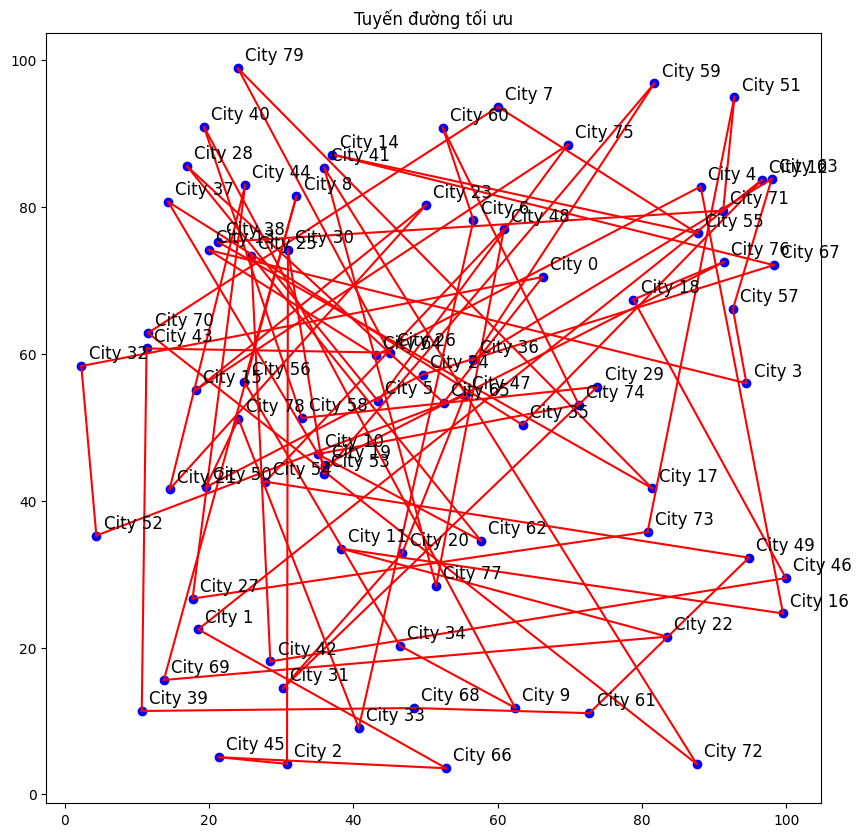

In [1]:
#
#* Mô phỏng bài toán TSP với 40 thành phố bằng thuật toán tối ưu MIP với tọa độ chi phí/ khoảng cách giữa các thành phố được chọn ngẫu nhiên (Sử dụng thư viện)
import numpy as np
import pulp
import matplotlib.pyplot as plt
import time

# Số lượng thành phố
num_cities = 80

# Tạo một ma trận chi phí ngẫu nhiên (có thể là khoảng cách, thời gian, tiền bạc, v.v.)
cost_matrix = np.random.randint(10, 100, size=(num_cities, num_cities))

# Đảm bảo chi phí từ một thành phố đến chính nó là rất lớn (không chọn)
np.fill_diagonal(cost_matrix, 9999)

# Vẽ các thành phố trên mặt phẳng tọa độ
coordinates = np.random.rand(num_cities, 2) * 100

# Kiểm tra và điều chỉnh tọa độ để không trùng nhau
# tolerance = 1e-2  # Tolerance để xác định khi nào hai tọa độ được coi là trùng nhau
# for i in range(num_cities):
#     for j in range(i + 1, num_cities):
#         while np.allclose(coordinates[i], coordinates[j], atol=tolerance):
#             coordinates[j] = np.random.rand(1, 2) * 100

# Khởi tạo mô hình tối ưu hóa
problem = pulp.LpProblem("TSP", pulp.LpMinimize)

# Tạo biến quyết định x[i][j]: 1 nếu thành phố i đi đến thành phố j
x = pulp.LpVariable.dicts("x", [(i, j) for i in range(num_cities) for j in range(num_cities)], cat='Binary')

# Hàm mục tiêu: Tối thiểu hóa tổng chi phí
problem += pulp.lpSum([cost_matrix[i][j] * x[i, j] for i in range(num_cities) for j in range(num_cities)])

# Ràng buộc: mỗi thành phố phải được ghé thăm và rời đi đúng một lần
for i in range(num_cities):
    problem += pulp.lpSum([x[i, j] for j in range(num_cities) if i != j]) == 1
    problem += pulp.lpSum([x[j, i] for j in range(num_cities) if i != j]) == 1

# Ràng buộc loại bỏ chu trình phụ
u = pulp.LpVariable.dicts("u", range(num_cities), lowBound=0, upBound=num_cities-1, cat='Integer')
for i in range(1, num_cities):
    for j in range(1, num_cities):
        if i != j:
            problem += u[i] - u[j] + num_cities * x[i, j] <= num_cities - 1

# Bắt đầu đo thời gian thực thi
start_time = time.time()

# Giải bài toán
problem.solve()

# Kết thúc đo thời gian thực thi
end_time = time.time()
execution_time = end_time - start_time

# Lấy kết quả
route = []
for i in range(num_cities):
    for j in range(num_cities):
        if pulp.value(x[i, j]) == 1:
            route.append((i, j))

print("Tuyến đường tốt nhất:")
for (i, j) in route:
    print(f"Thành phố {i} -> Thành phố {j} với chi phí {cost_matrix[i][j]}")

total_cost = pulp.value(problem.objective)
print(f"Tổng chi phí: {total_cost}")
print(f"Thời gian thực thi: {execution_time} giây")

# Vẽ tuyến đường tốt nhất
plt.figure(figsize=(10, 10))
for i in range(num_cities):
    plt.plot(coordinates[i, 0], coordinates[i, 1], 'bo')
    plt.text(coordinates[i, 0] + 1, coordinates[i, 1] + 1, f'City {i}', fontsize=12)

for (i, j) in route:
    plt.plot([coordinates[i, 0], coordinates[j, 0]], [coordinates[i, 1], coordinates[j, 1]], 'r-')

plt.title("Tuyến đường tối ưu")
plt.show()

Restricted license - for non-production use only - expires 2025-11-24
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 80 rows, 1600 columns and 3120 nonzeros
Model fingerprint: 0x472f1324
Variable types: 0 continuous, 1600 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.02s
Presolved: 80 rows, 1600 columns, 3120 nonzeros
Variable types: 0 continuous, 1600 integer (1600 binary)

Root relaxation: objective 9.880000e+02, 99 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf 

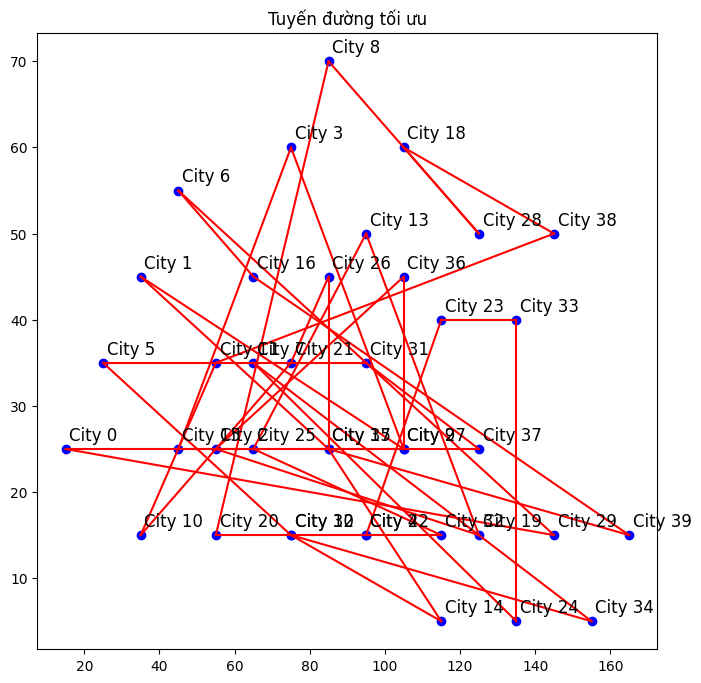

In [7]:
#
#? Mô phỏng bài toán TSP với 40 thành phố bằng thuật toán tối ưu MIP và cải tiến bài toán với Thuật toán Gurobipy (Sử dụng thư viện)
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
import time

# Số lượng thành phố
num_cities = 40

# Tạo ma trận chi phí cố định mới (ví dụ, khoảng cách giữa các thành phố)
cost_matrix = np.array([
    [9999, 35, 42, 58, 74, 91, 63, 27, 38, 19, 42, 56, 74, 85, 31, 53, 44, 25, 78, 93,
     35, 42, 58, 74, 91, 63, 27, 38, 19, 42, 56, 74, 85, 31, 53, 44, 25, 78, 93, 61],
    [35, 9999, 47, 19, 81, 64, 53, 22, 41, 29, 33, 49, 64, 78, 28, 61, 32, 18, 69, 84,
     45, 47, 19, 81, 64, 53, 22, 41, 29, 33, 49, 64, 78, 28, 61, 32, 18, 69, 84, 71],
    [42, 47, 9999, 52, 31, 87, 54, 39, 49, 62, 36, 55, 87, 62, 37, 73, 58, 45, 81, 27,
     52, 31, 87, 54, 39, 49, 62, 36, 55, 87, 62, 37, 73, 58, 45, 81, 27, 73, 41, 58],
    [58, 19, 52, 9999, 65, 23, 48, 34, 56, 21, 61, 75, 83, 43, 55, 19, 71, 48, 79, 56,
     65, 23, 48, 34, 56, 21, 61, 75, 83, 43, 55, 19, 71, 48, 79, 56, 71, 82, 39, 45],
    [74, 81, 31, 65, 9999, 52, 46, 19, 38, 72, 29, 33, 64, 48, 57, 85, 34, 42, 78, 91,
     52, 46, 19, 38, 72, 29, 33, 64, 48, 57, 85, 34, 42, 78, 91, 32, 29, 47, 85, 73],
    [91, 64, 87, 23, 52, 9999, 31, 59, 42, 33, 87, 56, 73, 41, 68, 52, 29, 55, 88, 67,
     31, 59, 42, 33, 87, 56, 73, 41, 68, 52, 29, 55, 88, 67, 73, 57, 39, 64, 29, 52],
    [63, 53, 54, 48, 46, 31, 9999, 22, 57, 68, 42, 75, 23, 58, 34, 67, 19, 49, 87, 43,
     22, 57, 68, 42, 75, 23, 58, 34, 67, 19, 49, 87, 43, 58, 37, 27, 53, 64, 42, 31],
    [27, 22, 39, 34, 19, 59, 22, 9999, 42, 37, 58, 75, 24, 49, 35, 62, 41, 27, 74, 87,
     42, 37, 58, 75, 24, 49, 35, 62, 41, 27, 74, 87, 35, 32, 23, 48, 29, 57, 31, 28],
    [38, 41, 49, 56, 38, 42, 57, 42, 9999, 19, 53, 79, 43, 85, 34, 58, 49, 45, 68, 73,
     19, 53, 79, 43, 85, 34, 58, 49, 45, 68, 73, 57, 31, 28, 41, 58, 47, 32, 56, 42],
    [19, 29, 62, 21, 72, 33, 68, 37, 19, 9999, 31, 44, 65, 54, 57, 28, 48, 37, 62, 85,
     31, 44, 65, 54, 57, 28, 48, 37, 62, 85, 32, 41, 29, 47, 63, 75, 57, 43, 29, 51],
    [42, 33, 36, 61, 29, 87, 42, 58, 53, 31, 9999, 21, 74, 39, 47, 62, 52, 43, 67, 48,
     21, 74, 39, 47, 62, 52, 43, 67, 48, 57, 31, 29, 63, 47, 52, 43, 69, 78, 45, 41],
    [56, 49, 55, 75, 33, 56, 75, 75, 79, 44, 21, 9999, 28, 63, 58, 32, 48, 59, 72, 57,
     28, 63, 58, 32, 48, 59, 72, 57, 47, 31, 52, 78, 29, 32, 41, 54, 47, 36, 29, 65],
    [74, 64, 87, 83, 64, 73, 23, 24, 43, 65, 74, 28, 9999, 42, 19, 48, 53, 65, 87, 74,
     42, 19, 48, 53, 65, 87, 74, 29, 34, 42, 37, 58, 45, 47, 29, 32, 57, 48, 35, 43],
    [85, 78, 62, 43, 48, 41, 58, 49, 85, 54, 39, 63, 42, 9999, 53, 72, 63, 78, 54, 21,
     53, 72, 63, 78, 54, 21, 53, 47, 38, 43, 57, 29, 52, 41, 29, 28, 31, 57, 43, 61],
    [31, 28, 37, 55, 57, 68, 34, 35, 34, 57, 47, 58, 19, 53, 9999, 37, 56, 49, 64, 72,
     37, 56, 49, 64, 72, 63, 47, 38, 49, 56, 42, 31, 58, 47, 36, 28, 27, 39, 41, 59],
    [53, 61, 73, 19, 85, 52, 67, 62, 58, 28, 62, 32, 48, 72, 37, 9999, 29, 42, 75, 81,
     29, 42, 75, 81, 64, 57, 39, 49, 58, 73, 67, 41, 28, 32, 47, 58, 41, 29, 32, 45],
    [44, 32, 58, 71, 34, 29, 19, 41, 49, 48, 52, 48, 53, 63, 56, 29, 9999, 57, 62, 84,
     57, 62, 84, 57, 62, 74, 53, 41, 29, 57, 49, 36, 29, 47, 58, 31, 42, 47, 57, 32],
    [25, 18, 45, 48, 42, 55, 49, 27, 45, 37, 43, 59, 65, 78, 49, 42, 57, 9999, 31, 65,
     57, 42, 67, 53, 68, 74, 63, 41, 49, 35, 67, 32, 48, 31, 57, 49, 53, 62, 32, 28],
    [78, 69, 81, 79, 78, 88, 87, 74, 68, 62, 67, 72, 87, 54, 64, 75, 62, 31, 9999, 42,
     67, 74, 57, 58, 67, 78, 57, 43, 32, 47, 63, 64, 57, 49, 35, 67, 41, 58, 39, 57],
    [93, 84, 27, 56, 91, 67, 43, 87, 73, 85, 48, 57, 74, 21, 72, 81, 84, 65, 42, 9999,
     57, 74, 63, 67, 74, 63, 57, 47, 49, 57, 64, 73, 57, 39, 48, 41, 32, 57, 41, 38],
    [61, 71, 58, 45, 73, 52, 31, 28, 42, 51, 41, 65, 43, 61, 59, 45, 32, 28, 57, 38,
     9999, 43, 39, 48, 41, 32, 49, 43, 57, 51, 39, 42, 31, 39, 47, 38, 31, 57, 45, 53],
    [35, 45, 52, 65, 52, 31, 22, 42, 19, 31, 21, 28, 42, 53, 37, 29, 57, 57, 67, 57,
     43, 9999, 31, 48, 57, 41, 29, 57, 49, 32, 29, 31, 47, 39, 38, 57, 47, 52, 61, 39],
    [42, 47, 31, 87, 46, 59, 57, 37, 53, 44, 74, 63, 19, 72, 56, 42, 62, 42, 74, 74,
     39, 31, 9999, 32, 47, 43, 57, 39, 31, 48, 67, 58, 45, 49, 63, 47, 58, 32, 41, 51],
    [58, 19, 54, 34, 19, 42, 68, 58, 79, 65, 47, 32, 53, 78, 64, 81, 84, 67, 58, 67,
     48, 48, 32, 9999, 42, 29, 47, 35, 67, 57, 45, 38, 31, 29, 41, 32, 57, 58, 67, 57],
    [74, 81, 39, 56, 72, 33, 75, 24, 43, 57, 63, 48, 65, 54, 72, 64, 57, 68, 67, 74,
     41, 57, 47, 42, 9999, 57, 43, 67, 58, 63, 39, 51, 57, 32, 39, 47, 58, 49, 37, 41],
    [91, 64, 49, 21, 29, 87, 23, 49, 85, 28, 62, 59, 87, 21, 63, 57, 74, 74, 78, 63,
     32, 41, 43, 29, 57, 9999, 41, 58, 47, 49, 41, 32, 28, 39, 67, 31, 29, 58, 31, 37],
    [63, 53, 62, 61, 33, 56, 58, 35, 34, 47, 52, 72, 74, 53, 47, 39, 53, 63, 57, 57,
     49, 29, 57, 47, 43, 41, 9999, 42, 57, 39, 58, 57, 45, 49, 67, 31, 39, 47, 58, 45],
    [27, 22, 36, 34, 29, 41, 34, 62, 28, 43, 67, 57, 29, 47, 38, 49, 41, 41, 43, 47,
     43, 57, 39, 35, 67, 58, 42, 9999, 57, 39, 48, 41, 47, 58, 29, 41, 39, 47, 29, 57],
    [38, 41, 55, 56, 47, 68, 27, 41, 19, 29, 48, 47, 34, 38, 49, 58, 29, 49, 32, 49,
     57, 49, 31, 67, 58, 47, 57, 57, 9999, 47, 45, 48, 67, 31, 32, 29, 39, 41, 57, 35],
    [19, 33, 62, 21, 57, 52, 53, 27, 45, 29, 57, 31, 42, 43, 56, 73, 57, 35, 47, 57,
     51, 32, 48, 57, 63, 49, 39, 39, 47, 9999, 32, 29, 43, 29, 39, 41, 31, 57, 45, 48],
    [42, 49, 62, 61, 85, 41, 64, 74, 68, 39, 57, 52, 37, 57, 42, 67, 49, 67, 64, 57,
     39, 29, 67, 45, 39, 41, 58, 48, 45, 32, 9999, 39, 58, 47, 31, 39, 47, 58, 35, 57],
    [56, 63, 37, 19, 34, 29, 58, 87, 57, 47, 29, 32, 58, 29, 31, 41, 36, 32, 57, 73,
     31, 31, 58, 38, 51, 32, 57, 41, 48, 29, 39, 9999, 43, 39, 41, 28, 29, 32, 57, 41],
    [74, 78, 45, 71, 42, 55, 43, 35, 31, 63, 63, 78, 45, 52, 28, 32, 47, 57, 49, 57,
     47, 47, 45, 31, 57, 28, 45, 47, 67, 43, 58, 43, 9999, 42, 57, 31, 41, 32, 57, 48],
    [85, 28, 29, 48, 29, 73, 47, 32, 28, 47, 47, 29, 37, 29, 36, 41, 58, 48, 35, 39,
     38, 39, 49, 29, 32, 39, 49, 58, 31, 29, 47, 39, 42, 9999, 41, 39, 57, 39, 57, 43],
    [31, 53, 73, 71, 47, 29, 27, 23, 41, 63, 52, 41, 29, 52, 47, 41, 47, 31, 57, 48,
     57, 38, 63, 29, 39, 67, 67, 29, 32, 39, 31, 41, 57, 41, 9999, 31, 41, 42, 39, 57],
    [53, 44, 58, 82, 85, 57, 31, 48, 56, 75, 78, 47, 32, 28, 58, 32, 58, 57, 67, 41,
     39, 57, 47, 32, 47, 31, 31, 41, 29, 41, 39, 28, 31, 39, 31, 9999, 47, 31, 57, 38],
    [44, 25, 45, 39, 32, 73, 39, 29, 47, 57, 69, 41, 48, 31, 41, 58, 42, 49, 41, 32,
     47, 58, 63, 41, 39, 29, 39, 29, 39, 31, 47, 29, 41, 57, 41, 47, 9999, 41, 57, 49],
    [25, 78, 41, 82, 29, 39, 39, 57, 32, 43, 78, 31, 57, 57, 39, 41, 47, 53, 39, 41,
     38, 31, 58, 57, 47, 58, 47, 39, 41, 41, 47, 29, 41, 39, 42, 31, 41, 9999, 39, 41],
    [78, 93, 73, 39, 47, 64, 42, 31, 56, 29, 45, 29, 48, 43, 41, 29, 57, 49, 32, 41,
     31, 57, 41, 67, 58, 31, 58, 29, 57, 57, 35, 57, 57, 57, 39, 57, 57, 39, 9999, 35],
    [93, 61, 41, 45, 85, 52, 31, 28, 42, 51, 41, 65, 43, 61, 59, 45, 32, 28, 57, 38,
     53, 39, 51, 57, 41, 37, 45, 57, 39, 48, 41, 41, 48, 43, 57, 38, 49, 41, 35, 9999],
])

coordinates = np.array([
    [15, 25], [35, 45], [55, 25], [75, 60], [95, 15],
    [25, 35], [45, 55], [65, 35], [85, 70], [105, 25],
    [35, 15], [55, 35], [75, 15], [95, 50], [115, 5],
    [45, 25], [65, 45], [85, 25], [105, 60], [125, 15],
    [55, 15], [75, 35], [95, 15], [115, 40], [135, 5],
    [65, 25], [85, 45], [105, 25], [125, 50], [145, 15],
    [75, 15], [95, 35], [115, 15], [135, 40], [155, 5],
    [85, 25], [105, 45], [125, 25], [145, 50], [165, 15]
])

# Khởi tạo mô hình
model = gp.Model()

# Tạo biến quyết định x[i][j] = 1 nếu có chuyến đi từ thành phố i đến j, ngược lại là 0
x = model.addVars(num_cities, num_cities, vtype=GRB.BINARY, name="x")

# Hàm mục tiêu: Tối thiểu hóa tổng chi phí
model.setObjective(gp.quicksum(cost_matrix[i][j] * x[i, j] for i in range(num_cities) for j in range(num_cities)), GRB.MINIMIZE)

# Ràng buộc: Mỗi thành phố phải được ghé thăm và rời đi đúng một lần
model.addConstrs(gp.quicksum(x[i, j] for j in range(num_cities) if i != j) == 1 for i in range(num_cities))
model.addConstrs(gp.quicksum(x[j, i] for j in range(num_cities) if i != j) == 1 for i in range(num_cities))

# Hàm callback để loại bỏ các chu trình con
def subtour_elimination(model, where):
    if where == GRB.Callback.MIPSOL:
        vals = model.cbGetSolution(x)
        selected_edges = gp.tuplelist((i, j) for i in range(num_cities) for j in range(num_cities) if vals[i, j] > 0.5)
        
        # Tìm các chu trình con
        tour = find_subtour(selected_edges)
        if len(tour) < num_cities:
            model.cbLazy(gp.quicksum(x[i, j] for i in tour for j in tour if i != j) <= len(tour) - 1)

def find_subtour(edges):
    unvisited = list(range(num_cities))
    cycle = range(num_cities + 1)  # Bắt đầu với một chu trình không thể xảy ra
    while unvisited:  # True nếu danh sách không rỗng
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i, j in edges.select(current, '*') if j in unvisited]
        if len(thiscycle) < len(cycle):
            cycle = thiscycle
    return cycle

# Đo thời gian bắt đầu
start_time = time.time()

# Tối ưu hóa mô hình với callback cho các ràng buộc lười biếng
model._vars = x
model.Params.LazyConstraints = 1
model.optimize(subtour_elimination)

# Đo thời gian kết thúc
end_time = time.time()

# Lấy kết quả
best_route = []
for i in range(num_cities):
    for j in range(num_cities):
        if x[i, j].x > 0.5:
            best_route.append((i, j))

# In kết quả
print("Tuyến đường tốt nhất:")
for (i, j) in best_route:
    print(f"Thành phố {i} -> Thành phố {j} với chi phí {cost_matrix[i][j]}")

total_cost = model.ObjVal
print(f"Tổng chi phí: {total_cost}")
print(f"Thời gian thực hiện: {end_time - start_time} giây")

# Vẽ tuyến đường tốt nhất
plt.figure(figsize=(8, 8))
for i in range(num_cities):
    plt.plot(coordinates[i, 0], coordinates[i, 1], 'bo')
    plt.text(coordinates[i, 0] + 1, coordinates[i, 1] + 1, f'City {i}', fontsize=12)

for (i, j) in best_route:
    plt.plot([coordinates[i, 0], coordinates[j, 0]], [coordinates[i, 1], coordinates[j, 1]], 'r-')

plt.title("Tuyến đường tối ưu")
plt.show()

Set parameter LazyConstraints to value 1
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 80 rows, 1600 columns and 3120 nonzeros
Model fingerprint: 0x8a068237
Variable types: 0 continuous, 1600 integer (1600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 80 rows, 1600 columns, 3120 nonzeros
Variable types: 0 continuous, 1600 integer (1600 binary)

Root relaxation: objective 5.280000e+02, 84 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  528.00000   

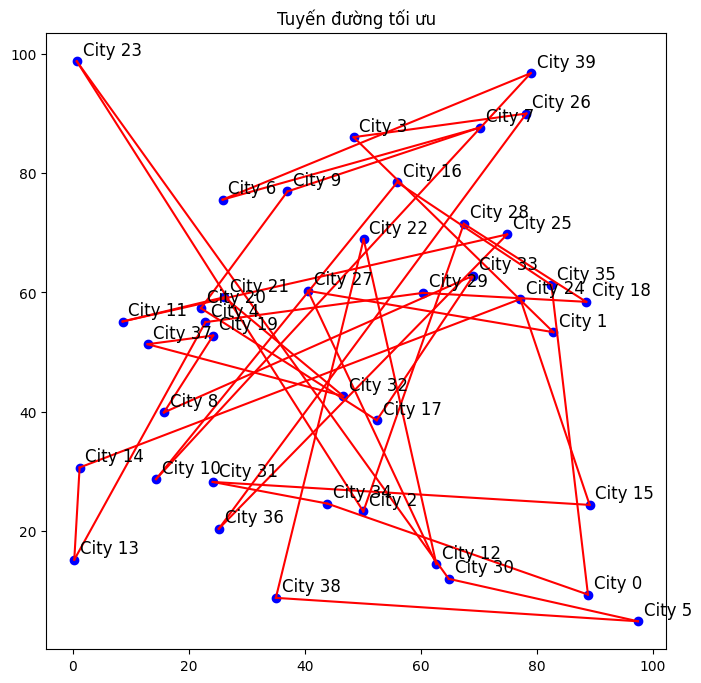

In [12]:
#
#* Mô phỏng bài toán TSP với 40 thành phố bằng thuật toán tối ưu MIP và cải tiến bài toán với Thuật toán Gurobipy (Sử dụng thư viện)
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
import time

# Số lượng thành phố
num_cities = 40

# Tạo một ma trận chi phí ngẫu nhiên (có thể là khoảng cách, thời gian, tiền bạc, v.v.)
cost_matrix = np.random.randint(10, 100, size=(num_cities, num_cities))

# Đảm bảo chi phí từ một thành phố đến chính nó là rất lớn (không chọn)
np.fill_diagonal(cost_matrix, 9999)

# Vẽ các thành phố trên mặt phẳng tọa độ
coordinates = np.random.rand(num_cities, 2) * 100

# Khởi tạo mô hình
model = gp.Model()

# Tạo biến quyết định x[i][j] = 1 nếu có chuyến đi từ thành phố i đến j, ngược lại là 0
x = model.addVars(num_cities, num_cities, vtype=GRB.BINARY, name="x")

# Hàm mục tiêu: Tối thiểu hóa tổng chi phí
model.setObjective(gp.quicksum(cost_matrix[i][j] * x[i, j] for i in range(num_cities) for j in range(num_cities)), GRB.MINIMIZE)

# Ràng buộc: Mỗi thành phố phải được ghé thăm và rời đi đúng một lần
model.addConstrs(gp.quicksum(x[i, j] for j in range(num_cities) if i != j) == 1 for i in range(num_cities))
model.addConstrs(gp.quicksum(x[j, i] for j in range(num_cities) if i != j) == 1 for i in range(num_cities))

# Hàm callback để loại bỏ các chu trình con
def subtour_elimination(model, where):
    if where == GRB.Callback.MIPSOL:
        vals = model.cbGetSolution(x)
        selected_edges = gp.tuplelist((i, j) for i in range(num_cities) for j in range(num_cities) if vals[i, j] > 0.5)
        
        # Tìm các chu trình con
        tour = find_subtour(selected_edges)
        if len(tour) < num_cities:
            model.cbLazy(gp.quicksum(x[i, j] for i in tour for j in tour if i != j) <= len(tour) - 1)

def find_subtour(edges):
    unvisited = list(range(num_cities))
    cycle = range(num_cities + 1)  # Bắt đầu với một chu trình không thể xảy ra
    while unvisited:  # True nếu danh sách không rỗng
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i, j in edges.select(current, '*') if j in unvisited]
        if len(thiscycle) < len(cycle):
            cycle = thiscycle
    return cycle

# Đo thời gian bắt đầu
start_time = time.time()

# Tối ưu hóa mô hình với callback cho các ràng buộc lười biếng
model._vars = x
model.Params.LazyConstraints = 1
model.optimize(subtour_elimination)

# Đo thời gian kết thúc
end_time = time.time()

# Lấy kết quả
best_route = []
for i in range(num_cities):
    for j in range(num_cities):
        if x[i, j].x > 0.5:
            best_route.append((i, j))

# In kết quả
print("Tuyến đường tốt nhất:")
for (i, j) in best_route:
    print(f"Thành phố {i} -> Thành phố {j} với chi phí {cost_matrix[i][j]}")

total_cost = model.ObjVal
print(f"Tổng chi phí: {total_cost}")
print(f"Thời gian thực hiện: {end_time - start_time} giây")

# Vẽ tuyến đường tốt nhất
plt.figure(figsize=(8, 8))
for i in range(num_cities):
    plt.plot(coordinates[i, 0], coordinates[i, 1], 'bo')
    plt.text(coordinates[i, 0] + 1, coordinates[i, 1] + 1, f'City {i}', fontsize=12)

for (i, j) in best_route:
    plt.plot([coordinates[i, 0], coordinates[j, 0]], [coordinates[i, 1], coordinates[j, 1]], 'r-')

plt.title("Tuyến đường tối ưu")
plt.show()
